In [6]:
# Run all analysis notebooks used
from IPython.utils import io
with io.capture_output() as output_13:
    %run '13_read_simu_assuming_ralf_initial_dist.ipynb'

In [2]:
from IPython.core.display import HTML
HTML("<style>.container { wdith:90% !important;}</style>")
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle the code"></form>''')

\section{Energy spectrum of produced neutrons}

\subsection{Introduction}

The energy spectrum of the neutrons that are produced in the neutron generator can be determined with a liquid scintillator detector.
We used an 2 $\times$ 2 - inch cylindrical NE-213 detector (described in section~\ref{sec_setup}) to measure the recoil spectrum of the neutrons.
This is then compared to an expected recoil spectrum, based on a Monte Carlo simulation of the geometry of the neutron generator and the known response of the NE-213 detector.

\subsection{Data selection}
The data of the NE-213 scintillator consists of a two-dimensional histogram, that is filled by one entry per event.
The two variables that are stored are the pulse height, which is proportional to the recoil energy, and a pulse shape discrimination parameter. 
This parameter is used to distinguish the pulse shapes for a nuclear recoil (NR) interaction (neutron collision) and the electronic recoil (ER) background, mostly caused by gamma ray interactions.

Fig.~\ref{spec2d} shows the histograms for data taken with the neutron generator on (a) and background data (b). 
The pulse height is converted to recoil energy (electronic recoil equivalent) by Monte Carlo matching of a Bi-207 calibration spectrum. A linear scale is assumed, which we verified to be correct at various six energies ranging up to 1546 keV (using Bi-207, Na-22 and Cs-137 as calibration sources). 

We obtain the recoil spectrum for the neutrons by cutting at the 99.0\% background rejection line, as shown in Fig.~\ref{spec2d}. 
We calculate the background leakage by using the events passing the cut in the background data set and using the appropriate scaling for livetime. 
At an energy 80 keV, a vertical band can be seen, which is caused by characteristic X-ray emission from the lead surrounding the NE-213.
We apply an energy threshold cut at 130 keV to take these away. 

NOTE maybe lower this...


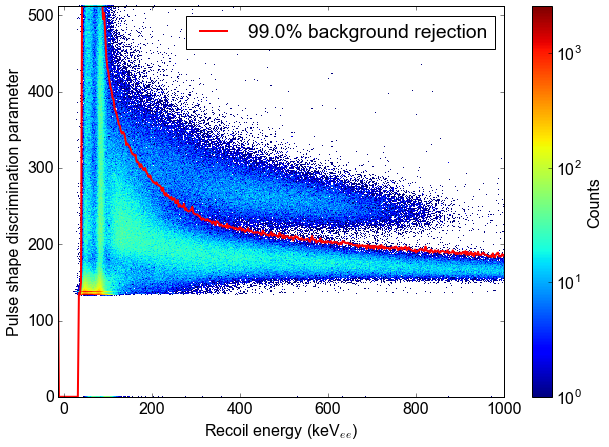

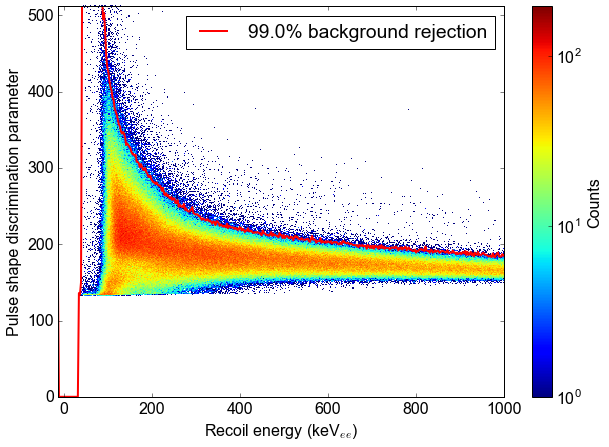

In [3]:
cut = cut_list[0]
rebin_x = 1
rebin_y = 1
x_max = 1000 # keVee
y_max = 512

# This is to avoid vertical lines (no-data lines)
nbins_x = len(e_scale_and[e_scale_and < x_max])
x_min = e_scale_and[0]
x_max = e_scale_and[nbins_x]

plt.figure(figsize=(10,7))
plt.hist2d(poly_1(spec2d_counts_x, *p_scale_to_e_and), spec2d_counts_y, bins=(nbins_x/rebin_x,y_max/rebin_y), 
           norm=LogNorm(), range=((x_min,x_max),(0,y_max)))
plt.plot(e_scale_and, cut.pct_list, color='red', lw=2, label='%.1f%% background rejection' %  cut.pct)
plt.colorbar(label = 'Counts')
plt.xlabel('Recoil energy (keV$_{ee}$)')
plt.ylabel('Pulse shape discrimination parameter')
plt.legend()
plt.savefig('./figs/hist2d_ng.png', bbox_inches = 'tight')
plt.savefig('./figs/hist2d_ng.pdf', bbox_inches = 'tight')
plt.show()

plt.figure(figsize=(10,7))
plt.hist2d(poly_1(spec2d_bg_counts_x, *p_scale_to_e_and), spec2d_bg_counts_y, bins=(nbins_x/rebin_x,y_max/rebin_y), 
           norm=LogNorm(), range=((x_min,x_max),(0,y_max)))
plt.plot(e_scale_and, cut.pct_list, color='red', lw=2, label='%.1f%% background rejection' %  cut.pct)
plt.colorbar(label = 'Counts')
plt.xlabel('Recoil energy (keV$_{ee}$)')
plt.ylabel('Pulse shape discrimination parameter')
plt.legend()
plt.savefig('./figs/hist2d_bg.png', bbox_inches = 'tight')
plt.savefig('./figs/hist2d_bg.pdf', bbox_inches = 'tight')
plt.show()

At low recoil energies, the pulse shape discrimination becomes less efficient and the NR and ER bands start to overlap.
This causes a reduced acceptance at low energy.
We calculate the acceptance as a function of recoil energy by taking a slice in energy in both the neutron generator data and the background data.
We subtract the background data and apply a Gaussian fit to the resulting neutron spectrum.
The neutron acceptance is now defined as the area fraction of the Gaussian function above the background rejection threshold. As we require a contiuous smooth function for the acceptance, we apply a smoothing (lowpass) filter and use an interpolation. The resulting acceptance function is shown in Fig.~\ref{xxx}


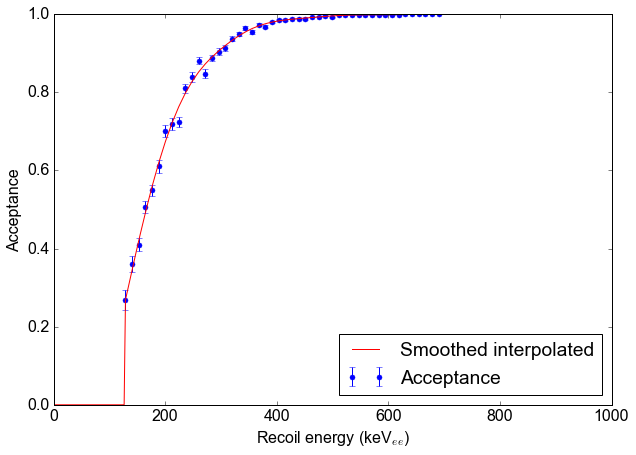

In [13]:
plt.errorbar(x_acc, y_acc, (dy_acc_plus, dy_acc_min), marker='.', markersize=10, ls='None', label='Acceptance')
# plt.plot(x_acc, acc_smooth,color='green',label='Smoothed')
# plt.plot(x_acc, acc_smooth_plus,color='green', ls='--',label='Smoothed +1 $\sigma$')
# plt.plot(x_acc, acc_smooth_min,color='green', ls='--',label='Smoothed -1 $\sigma$')
plt.plot(e_scale, acc_e, label='Smoothed interpolated', color='red')
plt.xlim(0,1000)
plt.legend(loc='lower right')
plt.xlabel('Recoil energy (keV$_{ee}$)')
plt.ylabel('Acceptance')
plt.savefig('./figs/acceptance.png', bbox_inches='tight')
plt.savefig('./figs/acceptance.pdf', bbox_inches='tight')
plt.show()


/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in true_divide


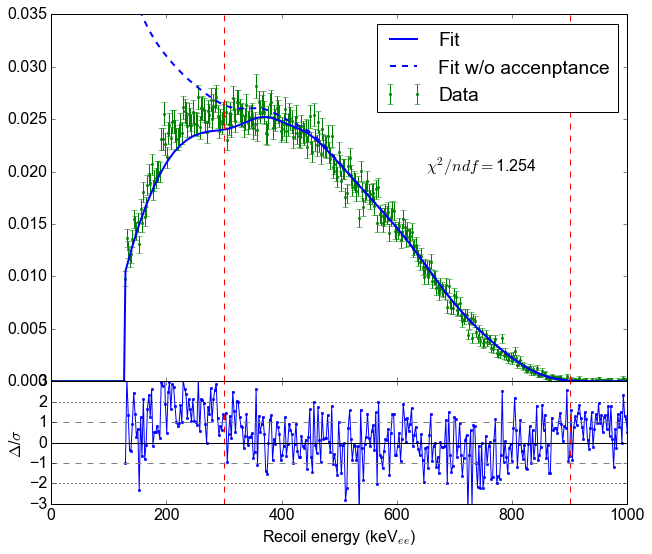

In [14]:
plt.figure(figsize=(10,8.5))
# Top frame
frame1=plt.gcf().add_axes((.1,.3,.8,.6))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
# Plot fit
fit_disc_sub_acc.plot_data(ls='None', marker='.', markersize=5, color='green', label='Data')
fit_disc_sub_acc.plot_fit(color='blue', lw=2, label='Fit')
fit_disc_sub_acc.plot_fit_no_acc(color='blue', lw=2, ls='--', label='Fit w/o accenptance')
fit_disc_sub_acc.plot_limits()
#fit_disc_sub_acc.plot_fit_acc_plusminus(acc_e_min2, acc_e_plus2, alpha=0.25)


plt.ylim(0,0.035)
plt.text(650, 0.02,'$\chi^2/ndf = $%.3f' % (fit_disc_sub_acc.opt_chi2()))
plt.xlim(0,1000)

plt.legend()

frame2=plt.gcf().add_axes((.1,.1,.8,.2))   
fit_disc_sub_acc.plot_res(color='blue', marker='.', markersize=5)
plt.ylabel('$\Delta$/$\sigma$')
plt.xlim(0,1000)
plt.ylim(-3,3)
plt.xlabel('Recoil energy (keV$_{ee}$)')

#frame1.set_title('Fig. 4: fit to BG discriminated data, acc corrected')
plt.savefig('./figs/fit_with_acc.png', bbox_inches='tight')
plt.savefig('./figs/fit_with_acc.pdf', bbox_inches='tight')

plt.show()